In [22]:
%clear
import numpy as np
import argparse
import socket
import importlib
import time
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

import scipy.misc
import sys
BASE_DIR = os.getcwd()
ROOT_DIR = os.path.dirname(BASE_DIR) +'/pointnet2-master'
sys.path.append(BASE_DIR)
sys.path.append(ROOT_DIR)
print('BASE_DIR =' ,BASE_DIR)
print('ROOT_DIR =' ,ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'models'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
import provider
import modelnet_dataset
import modelnet_h5_dataset
import otherClassDataImport as chao_data_import
import EvaluationFunction as Evaluate
OUT_DIR = BASE_DIR + '/PL'
print('OUT_DIR =' ,OUT_DIR)

BASE_DIR = /home/chaotang/文档/Try
ROOT_DIR = /home/chaotang/文档/pointnet2-master
OUT_DIR = /home/chaotang/文档/Try/PL


cur_batch_data (16, 2048, 3)
cur_batch_label (16,)
Original_pl (16, 2048, 3)
chamfer_noisy 0.17141947572002192
RMSD_noisy 3.282960633148117


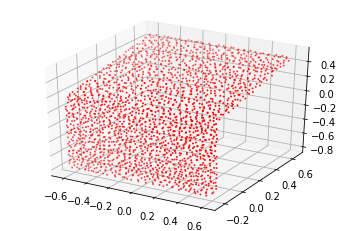

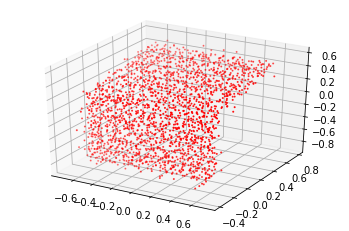

In [28]:
BATCH_SIZE = 16
NUM_POINT = 2048

test_index = 0
# Make sure batch data is of same size
cur_batch_data = np.zeros((BATCH_SIZE,NUM_POINT,3))
cur_batch_label = np.zeros((BATCH_SIZE), dtype=np.int32)

Original_pl = np.zeros((BATCH_SIZE,NUM_POINT,3))
Noisy_pl = np.zeros((BATCH_SIZE,NUM_POINT,3))

cur_batch_data,cur_batch_label = chao_data_import.get_data()
print('cur_batch_data',cur_batch_data.shape)# The shape of the data set is (16, 2048, 3)
print('cur_batch_label',cur_batch_label.shape)

Original_pl[:] = cur_batch_data[:]# 干净的点云
Noisy_pl[:] = cur_batch_data[:]# 有噪音的点云
Original_label = np.zeros(cur_batch_label.shape)
Original_label[:] = cur_batch_label[:]
print('Original_pl',Original_pl.shape)
chao_data_import.draw_pointcloud(Original_pl[test_index])
########################只有前k个点加上了噪音##############################################
k = 1000
Noisy_pl[test_index,0:k,:] = Original_pl[test_index,0:k,:] + 0.05 * np.random.normal(size = (k,3))# Noisy的点云

chao_data_import.draw_pointcloud(Noisy_pl[test_index])
output_file = Noisy_pl[test_index]

###################################################
################### Evaluation ####################
###################################################
chamfer_noisy  =  100 * Evaluate.chamfer_dist(Original_pl[test_index],Noisy_pl[test_index])
print('chamfer_noisy',chamfer_noisy)
RMSD_noisy  =  100 * Evaluate.RMSD(Original_pl[test_index],Noisy_pl[test_index])
print('RMSD_noisy',RMSD_noisy)

#np.savetxt(OUT_DIR+'/Laptop_noise_0.05',output_file)

In [30]:
process = np.loadtxt(OUT_DIR+"/0.05_Laplacian_pp.txt").astype(np.float32)
chamfer_noisy  = 100 * Evaluate.chamfer_dist(Original_pl[test_index],Noisy_pl[test_index])
chamfer_P = 100 * Evaluate.chamfer_dist(Original_pl[test_index],process)
RMSD_noisy  =  100 * Evaluate.RMSD(Original_pl[test_index],Noisy_pl[test_index])
RMSD_p  =  100 * Evaluate.RMSD(Original_pl[test_index],process)

print('chamfer_noisy',chamfer_noisy)
print('chamfer_new',chamfer_P)
print('RMSD_noisy',RMSD_noisy)
print('RMSD_p',RMSD_p)

chamfer_noisy 0.17141947572002192
chamfer_new 0.18658374792969956
RMSD_noisy 3.282960633148117
RMSD_p 2.92177925502593


In [ ]:
import show3d_balls as show3dball

In [ ]:
show3dball.showpoints(Noisy_pl[test_index])

In [ ]:
show3dball.showpoints(process)

In [ ]:
show3dball.showpoints(Original_pl[test_index])